In [1]:
import numpy as np
import cv2     # opencv
from PIL import Image    # PIL => pillow
import os
print("Imported")
import matplotlib.pyplot as plt
import seaborn as sns

Imported


In [2]:
cat_img_path = r"D:\ai-ml\deep_learning\cnn\data\images\cats\cat_1.jpg"
cat = Image.open(cat_img_path)

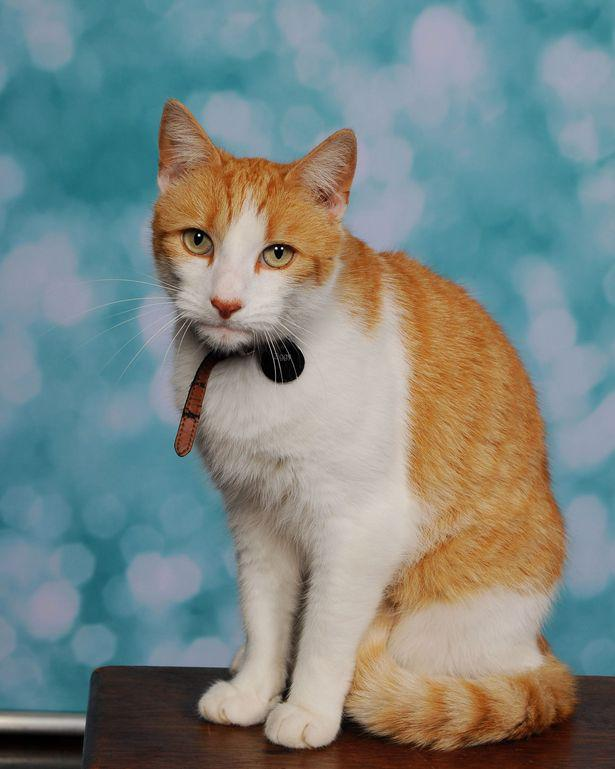

In [3]:
cat

In [4]:
type(cat)

PIL.JpegImagePlugin.JpegImageFile

In [5]:
cat_pixel = np.array(cat)
cat_pixel

# pixels => 0 - 255

array([[[ 94, 143, 158],
        [ 94, 143, 158],
        [ 97, 143, 159],
        ...,
        [ 83, 147, 159],
        [ 84, 148, 160],
        [ 85, 149, 161]],

       [[ 92, 141, 156],
        [ 93, 142, 157],
        [ 96, 142, 158],
        ...,
        [ 82, 146, 158],
        [ 84, 148, 160],
        [ 84, 148, 160]],

       [[ 90, 139, 154],
        [ 91, 140, 155],
        [ 94, 140, 155],
        ...,
        [ 82, 146, 158],
        [ 83, 147, 159],
        [ 84, 148, 160]],

       ...,

       [[ 43,  45,  42],
        [ 40,  45,  41],
        [ 41,  43,  40],
        ...,
        [ 58,  43,  40],
        [ 58,  43,  40],
        [ 58,  43,  40]],

       [[ 38,  40,  37],
        [ 35,  40,  36],
        [ 35,  37,  34],
        ...,
        [ 53,  38,  35],
        [ 51,  36,  33],
        [ 50,  35,  32]],

       [[ 35,  35,  35],
        [ 34,  36,  35],
        [ 35,  35,  35],
        ...,
        [ 54,  39,  36],
        [ 53,  38,  35],
        [ 58,  43,  40]]

In [6]:
cat_pixel.shape

(769, 615, 3)

In [7]:
cat_pixel.ndim

3

In [8]:
print(cat_pixel.min())
print(cat_pixel.max())

0
255


In [9]:
path_dict = {'cats':[],'dogs':[]}
base_dir = 'data/images'
from pathlib import Path

cat_dir = os.path.join(base_dir,'cats')
dog_dir = os.path.join(base_dir,'dogs')

for file in os.listdir(cat_dir):
    file_path = os.path.join(cat_dir,file)
    path_dict['cats'].append(Path(file_path))

for file in os.listdir(dog_dir):
    file_path = os.path.join(dog_dir,file)
    path_dict['dogs'].append(Path(file_path))

In [10]:
path_dict['cats'][25]

WindowsPath('data/images/cats/cat_137.jpg')

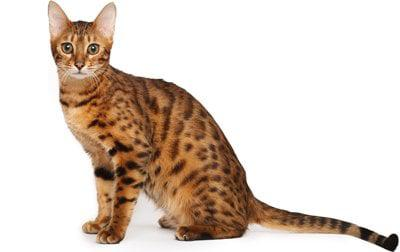

In [11]:
Image.open(path_dict['cats'][25])

In [12]:
# from pathlib import Path
# path_dict = {'cats':[],'dogs':[]}

# base_dir = r'./data/images'

# for dir_name in os.listdir(base_dir):    # cats , dogs
#     dir_paths = Path(os.path.join(base_dir,dir_name))

#     for img_name in os.listdir(dir_path):
#         path_dict[dir_name].append(Path(os.path.join(dir_name,img_name)))

# Chatgpt...

In [13]:
# folder_cats = './data/images/cats'
# folder_dogs = './data/images/dogs'

In [14]:
# image_files = [f for f in os.listdir(folder_cats) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
# for image_file in image_files:
#     image_cats = os.path.join(folder_cats, image_file)
#     print(image_cats)  # Process the path as needed

# image_files = [f for f in os.listdir(folder_dogs) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
# for image_file in image_files:
#     image_dogs = os.path.join(folder_dogs, image_file)
#     print(image_dogs)  # Process the path as needed

In [15]:
sample_img = cv2.imread(path_dict['dogs'][25])
reduced_img = cv2.resize(sample_img,(224,224))
reduced_img.shape

(224, 224, 3)

In [16]:
x = []
y = []
for class_name,paths in path_dict.items():
    for path in paths:   # []
        sample_img = cv2.imread(path)
        reduced_img = cv2.resize(sample_img,(224,224))
        x.append(reduced_img)
        y.append(class_name)

In [17]:
len(x) , len(y)

(697, 697)

In [18]:
# y = []
# for item in y:
#     if item == 'cats':
#         y.append(1)
#     else:
#         y.append(0)

In [19]:
Y = [1 if item == 'cats' else 0 for item in y]

In [20]:
set(Y)

{0, 1}

In [21]:
x = np.array(x)

In [22]:
type(Y)

list

In [23]:
X = np.array(x)
Y = np.array(Y)

In [24]:
X.ndim

4

In [25]:
type(X)  ,  type(Y)

(numpy.ndarray, numpy.ndarray)

In [26]:
X.shape

# 697 images
# size 224 height , 224 width , 3 channel (rgb)

(697, 224, 224, 3)

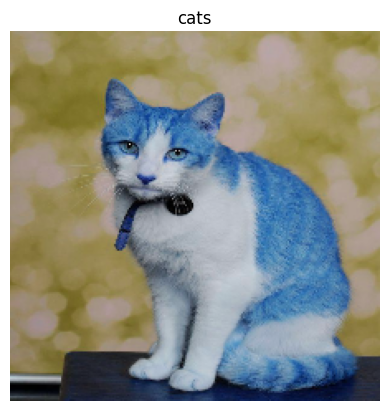

In [27]:
plt.imshow(X[0])
plt.title(y[0])
plt.axis('off')
plt.show()

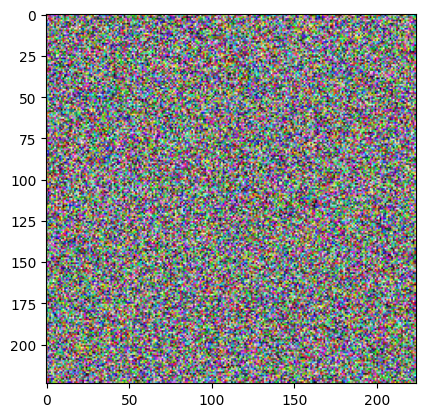

In [28]:
plt.imshow(np.random.randint(0,255,(224,224,3)))

In [29]:
# Range :-
# 0 - 255  =>  0 - 1
X = X/255.0    # minmax scaler...

In [30]:
X[255]

array([[[0.20784314, 0.42745098, 0.74901961],
        [0.21176471, 0.43137255, 0.75294118],
        [0.21960784, 0.43921569, 0.76078431],
        ...,
        [0.21960784, 0.41568627, 0.7254902 ],
        [0.21176471, 0.40392157, 0.70196078],
        [0.21176471, 0.40392157, 0.70196078]],

       [[0.20784314, 0.42745098, 0.74901961],
        [0.21176471, 0.43137255, 0.75294118],
        [0.21960784, 0.43921569, 0.76078431],
        ...,
        [0.21960784, 0.41568627, 0.7254902 ],
        [0.20784314, 0.4       , 0.70196078],
        [0.21176471, 0.40392157, 0.70196078]],

       [[0.21176471, 0.42745098, 0.74901961],
        [0.21568627, 0.43529412, 0.75686275],
        [0.21960784, 0.44313725, 0.76470588],
        ...,
        [0.22352941, 0.41960784, 0.72941176],
        [0.21568627, 0.40392157, 0.70980392],
        [0.21568627, 0.40392157, 0.70588235]],

       ...,

       [[0.13333333, 0.36470588, 0.67843137],
        [0.1372549 , 0.36862745, 0.68235294],
        [0.14509804, 0

In [31]:
x[255]

array([[[ 53, 109, 191],
        [ 54, 110, 192],
        [ 56, 112, 194],
        ...,
        [ 56, 106, 185],
        [ 54, 103, 179],
        [ 54, 103, 179]],

       [[ 53, 109, 191],
        [ 54, 110, 192],
        [ 56, 112, 194],
        ...,
        [ 56, 106, 185],
        [ 53, 102, 179],
        [ 54, 103, 179]],

       [[ 54, 109, 191],
        [ 55, 111, 193],
        [ 56, 113, 195],
        ...,
        [ 57, 107, 186],
        [ 55, 103, 181],
        [ 55, 103, 180]],

       ...,

       [[ 34,  93, 173],
        [ 35,  94, 174],
        [ 37,  96, 176],
        ...,
        [ 36,  83, 156],
        [ 36,  81, 153],
        [ 36,  81, 152]],

       [[ 34,  93, 173],
        [ 34,  93, 173],
        [ 36,  95, 175],
        ...,
        [ 35,  83, 155],
        [ 35,  80, 152],
        [ 35,  81, 152]],

       [[ 33,  92, 172],
        [ 34,  93, 173],
        [ 35,  94, 174],
        ...,
        [ 34,  82, 155],
        [ 34,  80, 151],
        [ 34,  80, 151]]

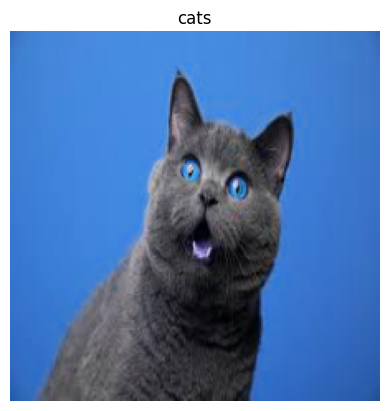

In [32]:
plt.imshow(x[255])
plt.title(y[255])
plt.axis('off')
plt.show()

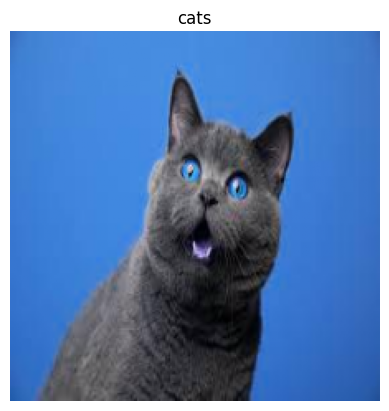

In [33]:
plt.imshow(X[255])
plt.title(y[255])
plt.axis('off')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test  = train_test_split(X,Y,test_size=0.15,random_state=42)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# from 

In [37]:
x_train.shape

(592, 224, 224, 3)

In [40]:
cnn_model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(40, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(30, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(45, activation='relu'),
    layers.Dense(24, activation='relu'),
    
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
cnn_model.summary()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 40)   │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 30)     │        10,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 81120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 45)             │     3,650,445 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,687,276 (14.07 MB)

 Trainable params: 3,687,276 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history =  cnn_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5043 - loss: 0.8482 - val_accuracy: 0.5429 - val_loss: 0.6912
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5754 - loss: 0.6819 - val_accuracy: 0.5905 - val_loss: 0.6827
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7297 - loss: 0.6153 - val_accuracy: 0.6286 - val_loss: 0.6749
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8242 - loss: 0.5000 - val_accuracy: 0.6095 - val_loss: 0.6623
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8343 - loss: 0.4259 - val_accuracy: 0.6667 - val_loss: 0.8218


<Axes: >

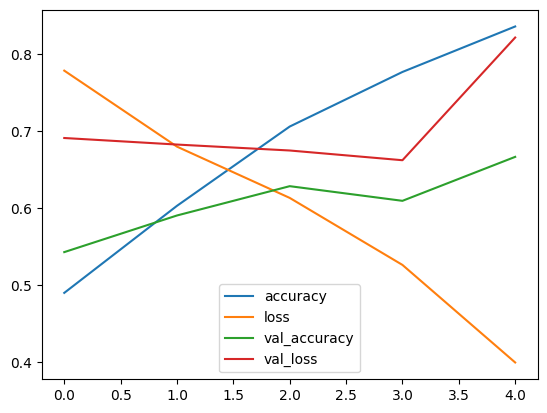

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [43]:
# prediction 
prediction = cnn_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step


In [44]:
prediction.shape  ,  x_test.shape

((105, 1), (105, 224, 224, 3))

In [45]:
pred = (prediction > 0.5).astype(int).ravel()

In [46]:
compare_df = pd.DataFrame({"Actual":y_test,"Prediction":pred})
compare_df.head()

,Actual,Prediction
0,1,1
1,0,1
2,0,1
3,1,1
4,1,1


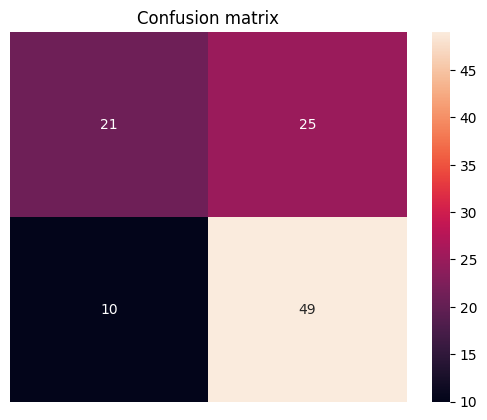


Classification report!
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        46
           1       0.66      0.83      0.74        59

    accuracy                           0.67       105
   macro avg       0.67      0.64      0.64       105
weighted avg       0.67      0.67      0.65       105



In [47]:
# confusion matrix 
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(compare_df['Actual'],compare_df['Prediction'])

sns.heatmap(matrix,annot=True,fmt='d')
plt.title("Confusion matrix")
plt.axis('off')
plt.show()

# classification report...
print()
print("Classification report!")
print(classification_report(compare_df['Actual'],compare_df['Prediction']))

In [48]:
# saving the objects..
import os
os.makedirs('prediction',exist_ok=True)
os.makedirs('models',exist_ok=True)
# compare_df['Actual'].map()

compare_df.to_csv('./prediction/predicted.csv',index=False)
cnn_model.save('./models/cnn_model.h5')
print('Successfully saved..')

Successfully saved..
